# Introduction
Online shopping and e-commerce has become an integral part of our modern economy, thanks to the ever increasing widespread coverage of the internet. Just in 2019, almost 2 billion people purchased goods online, and 3.5 trillion USD worth purchases happened online (1). Especially now, more than ever, with the Covid-19 pandemic causing a massive shift towards online shopping (2), and this preference for online shopping expected to remain permanently from now on (3), it is critically important for online business to start catering for the online customers. With the web based shops becoming ever-more streamlined to be as efficient as possible for the buyer by saving time for the customers, and personalizing their recommendations, the online market has become a highly competitive place for the sellers. 

However one of the most promising advantage of online shopping for the shops is the enormous amount of digital data that can be collected about the behaviour of the purchaser and the product page in the moments leading up to their decision on whether to purchase the item (4). This data can be then used by the websites to understand its customers and improve its structure and content dynamically to increase sales (5).

In this project, the question we are looking at is, "**Can we predict if an individual browsing the website will end up deciding to purchase the product?**" We will be training our model based on the [data](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) on online shoppers from the University of California Irvine's Machine Learning Repository, compiled by Okan Sakar from Bahcesehir University, and Yomi Kastro from Inveon Information Technologies Consultancy and Trade (4). This dataset consists of 10 numerical and 8 categorical attributes:
- Administrative: number of administrative pages visited by visitor in the session
- Administrative Duration: total time spent by the user in administrative pages
- Informational: number of informational pages visited by visitor in the session
- Informational Duration: total time spent by the user in informational pages
- Product Related: number of product related pages visited by visitor in the session
- Product Related Duration: total time spent by the user in product related pages
- Bounce Rate: percent of visitors who enter the site from that page then leve without triggering any other requests to the server
- Page Value: score for a web page that a user visited before completing a transaction
- Exit Rate: percent of visitors, for whom this page was the last page on the site
- Special Day: closeness of the site visiting time to a holiday
- Operating System
- Browser
- Region
- Traffic Type
- Visitor Type: returning or new
- Weekend: a boolean
- Month: of the year

This analysis will be divided into four sections. [First](#Data-Loading-and-Preprocessing) we will be loading and preprocessing the data. [Secondly](#Preliminary-Look) we will be doing preliminary study of the data, looking into which of the attributes look to be the most useful for our purposes, from which we will be picking the most significant attributes. [Thirdly](#Model-Training) we will be training our K-nearest neighbors model using the selected attributes. [Four](#Gauge), we will be gauging how well our model predicts the intention of the user. [Fifthly](#Discussion) and finally, we will be discussing about the effectiveness of our model and its implications.



(1) Coppola, Daniela. “E-Commerce Worldwide - Statistics & Facts.” Statista, 20 Feb. 2021, [[Web Link]](www.statista.com/topics/871/online-shopping)

(2) “COVID-19 and E-Commerce: Findings from a Survey of Online Consumers in 9 Countries.” United Nations Conference on Trade and Development, 2020, [[Web Link]](https://unctad.org/system/files/official-document/dtlstictinf2020d1_en.pdf)

(3) Hammond, G. (2021). Covid will trigger permanent shift to more shopping online, says segro. FT.Com, Retrieved from [[Web Link]](https://ezproxy.library.ubc.ca/login?url=https://www-proquest-com.ezproxy.library.ubc.ca/trade-journals/covid-will-trigger-permanent-shift-more-shopping/docview/2503230889/se-2?accountid=14656)

(4) Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [[Web Link]](https://doi.org/10.1007/s00521-018-3523-0)

(5) C.J. Carmona, S. Ramírez-Gallego, F. Torres, E. Bernal, M.J. del Jesus, S. García, Web usage mining to improve the design of an e-commerce website: OrOliveSur.com, Expert Systems with Applications, Volume 39, Issue 12, 2012, Pages 11243-11249, ISSN 0957-4174, https://doi.org/10.1016/j.eswa.2012.03.046. [[Web Link]](https://www.sciencedirect.com/science/article/pii/S0957417412005696)

# Data Loading and Preprocessing
[Back to Introduction](#Introduction)

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
install.packages("GGally")
library("GGally")
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

## Loading the data
First, the data set is loaded into R and converted `Revenue` to factor using the function `as_factor`. `Revenue` was converted into a factor given it is the target variable for our model.

In [2]:
# loads data from the original source on the web 
shoppers_data_full <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv")

# convert our target variable as a factor
shoppers_data <- shoppers_data_full %>% 
    mutate(Revenue = as_factor(Revenue))
shoppers_data

Parsed with column specification:
cols(
  Administrative = col_double(),
  Administrative_Duration = col_double(),
  Informational = col_double(),
  Informational_Duration = col_double(),
  ProductRelated = col_double(),
  ProductRelated_Duration = col_double(),
  BounceRates = col_double(),
  ExitRates = col_double(),
  PageValues = col_double(),
  SpecialDay = col_double(),
  Month = col_character(),
  OperatingSystems = col_double(),
  Browser = col_double(),
  Region = col_double(),
  TrafficType = col_double(),
  VisitorType = col_character(),
  Weekend = col_logical(),
  Revenue = col_logical()
)



Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<fct>
0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64,0.0,0.1,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0,0.2,0.2,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,0,0,0,6,184.25,0.08333333,0.08666667,0,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
4,75,0,0,15,346.00,0.00000000,0.02105263,0,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
0,0,0,0,3,21.25,0.00000000,0.06666667,0,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


### Splitting the Data
Here the data is split into train and test sets using `initial_split`. The proportion used was 75% train and 25% test to remain consistent with the example given on the course textbook.

In [3]:
set.seed(100)

# split the original data into training set and test set
shoppers_split <- initial_split(data = shoppers_data,
                                prop = 0.75,
                                strate = Revenue)

shoppers_training <- training(shoppers_split)
shoppers_testing <- testing(shoppers_split)

# Preliminary Look
[Back to Introduction](#Introduction)

There were no missing values in the data set. However, using the `group_by` and `summarize` function, we see that there is 10,422 false (84.5%) and 1,908 true observations (15.5%). 

In [4]:
# count the observations in two levels of Revenue and identify the existence of imbalance
shoppers_training_summary <- shoppers_training %>% 
    group_by(Revenue) %>% 
    summarize(observations = n()) 
shoppers_training_summary
# up sampling is required for further analysis

`summarise()` ungrouping output (override with `.groups` argument)



Revenue,observations
<fct>,<int>
FALSE,7831
TRUE,1417


### Balancing Observations
Then, we initialized a recipe for `shoppers_training` specifying `Revenue` as the target variable. Further, we use `step_upsample` to balance the number of observations so that there is 1:1 ratio for true and false. This is verified below using `summary` which showed that there are 7,817 false and 7,817 true observations in the training set.

In [5]:
# upsampling is applied on the data"
shoppers_analysis_recipe <- recipe(Revenue ~ ., data = shoppers_training) %>%
    step_upsample(Revenue, over_ratio = 1, skip = FALSE) %>% 
    prep()
shoppers_training_upsampled <- bake(shoppers_analysis_recipe,shoppers_training)

# check if training set is balanced
summary(shoppers_training_upsampled$Revenue)
shoppers_training_upsampled

Warning message:
“`step_upsample()` is deprecated as of recipes 0.1.13.
Please use `themis::step_upsample()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


FALSE  TRUE 
 7831  7831

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>,<fct>
0,0,0,0,2,64.000000,0.00,0.10,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,0,0,0,1,0.000000,0.20,0.20,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05,0.14,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,0,0,0,8,335.250,0.10000,0.10833333,0,0,Nov,3,12,1,1,Returning_Visitor,FALSE,TRUE
1,0,0,0,39,1159.542,0.00125,0.03125000,0,0,Nov,2,2,6,2,Returning_Visitor,TRUE,TRUE
0,0,0,0,6,254.500,0.00000,0.03333333,0,0,Nov,2,2,1,2,New_Visitor,FALSE,TRUE


### Choosing Variables
We encoded the `Revenue` to a numeric value using `mutate` and `ifelse`.

The correlation matrix and heatmap was created to help deduce which variables to use for our model. The 3 variables with the highest correlatation to `Revenue` were chosen: `PageValues`, `ExitRates`, and `BounceRates`.

Warning message in ggcorr(shoppers_training_numeric, hjust = 1, size = 4, label = TRUE):
“data in column(s) 'Month', 'VisitorType', 'Weekend' are not numeric and were ignored”


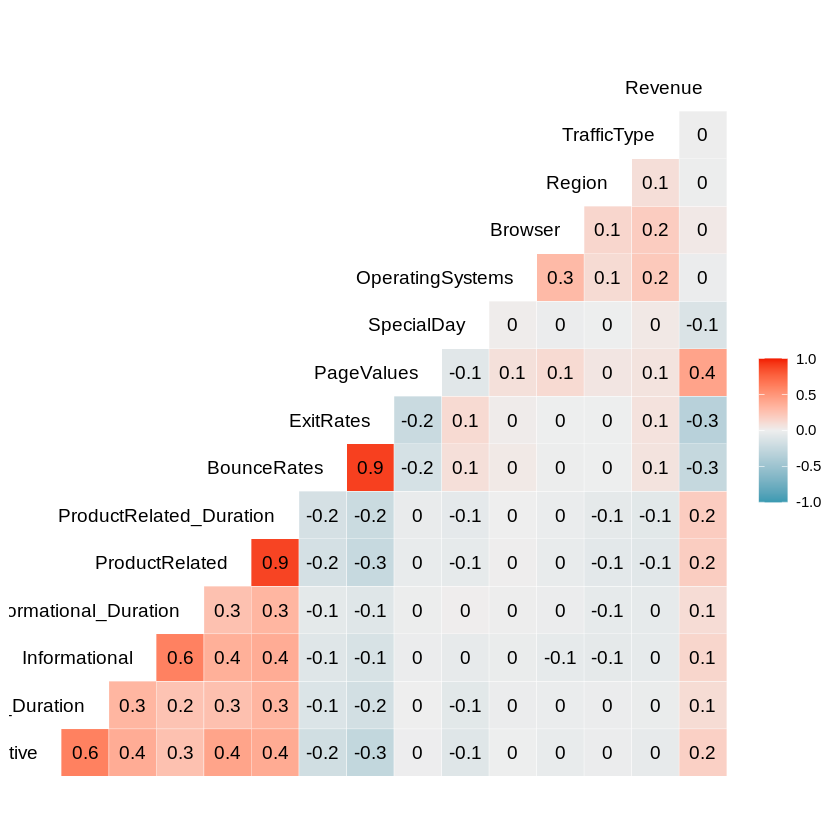

In [6]:
# change the Revenue into a numeric value
shoppers_training_numeric <- shoppers_training_upsampled %>% 
    mutate(Revenue = ifelse(Revenue==TRUE, 1, 0)) 

#  the visualization of correlation coefficients between each numerical variable in our data and our target, Revenue
shoppers_cor <- ggcorr(shoppers_training_numeric, hjust = 1, size = 4,label = TRUE)
shoppers_cor

We updated `shoppers_data` to only include our chosen and target variables.

In [7]:
# Choose the top three variables as predictors with the largest corrlation coefficient
shoppers_training_upsampled <- shoppers_training_upsampled %>% 
    select(BounceRates, ExitRates, PageValues, Revenue)
shoppers_training_upsampled

BounceRates,ExitRates,PageValues,Revenue
<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0,FALSE
0.20,0.20,0,FALSE
0.05,0.14,0,FALSE
⋮,⋮,⋮,⋮
0.10000,0.10833333,0,TRUE
0.00125,0.03125000,0,TRUE
0.00000,0.03333333,0,TRUE


### Preview of Data

Figures 1, 2 and 3 were created to preview the values of the categories. This step was done to check whether the axis had to be scaled and centered. The following figures reveal that `BounceRate` and `ExitRates` both had values ranging from 0 to 0.20, while `PageValues` were from 0 to 400. This means that the predictors must undergo further preprocessing to be standardized. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



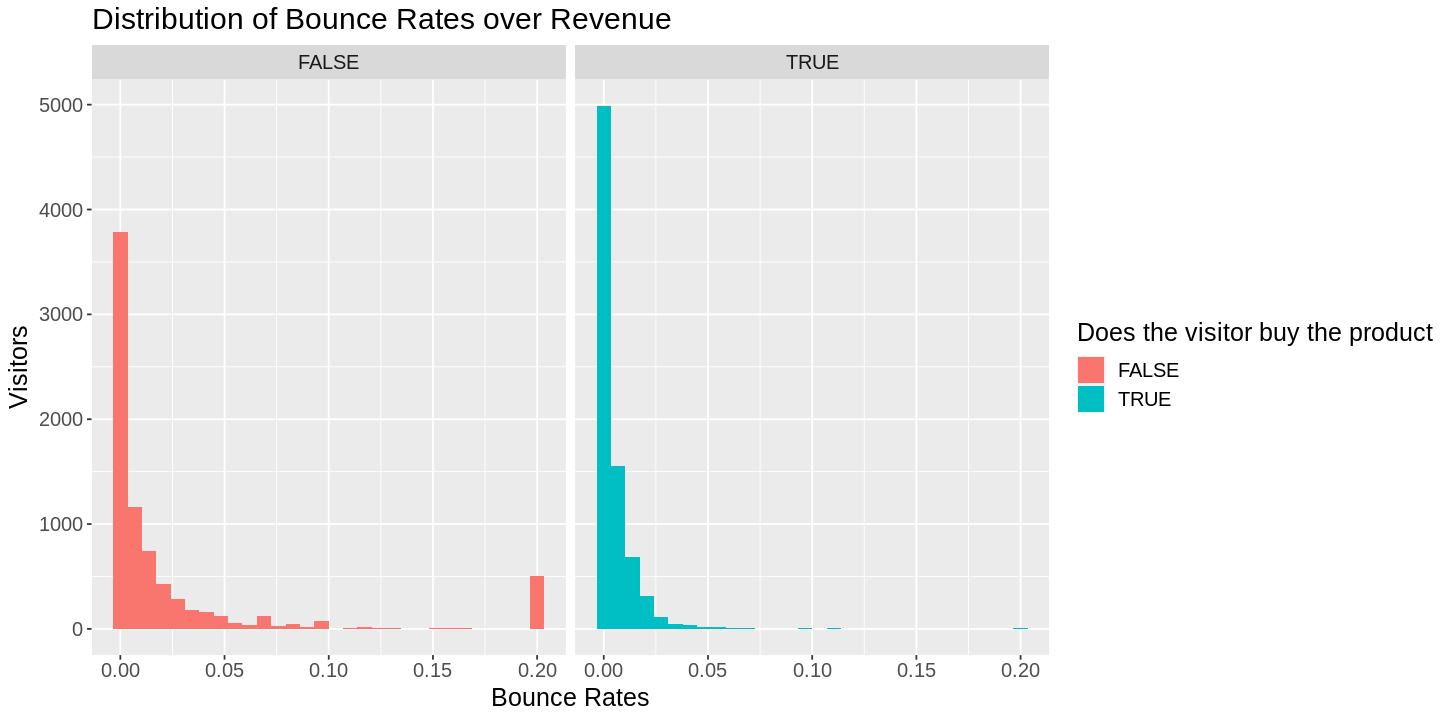

In [8]:
options(repr.plot.height = 6, repr.plot.width = 12)
bounce_hist <- ggplot(shoppers_training_upsampled, aes(x = BounceRates, fill = Revenue)) +
    geom_histogram(position = "identity") +
    facet_grid(. ~ Revenue)+
    labs(x = "Bounce Rates", y = "Visitors", fill = "Does the visitor buy the product",title="Distribution of Bounce Rates over Revenue") +
    theme(text = element_text(size = 15))
bounce_hist

Figure 1: Histogram of Bounce Rates split horizontally by revenue (training set)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



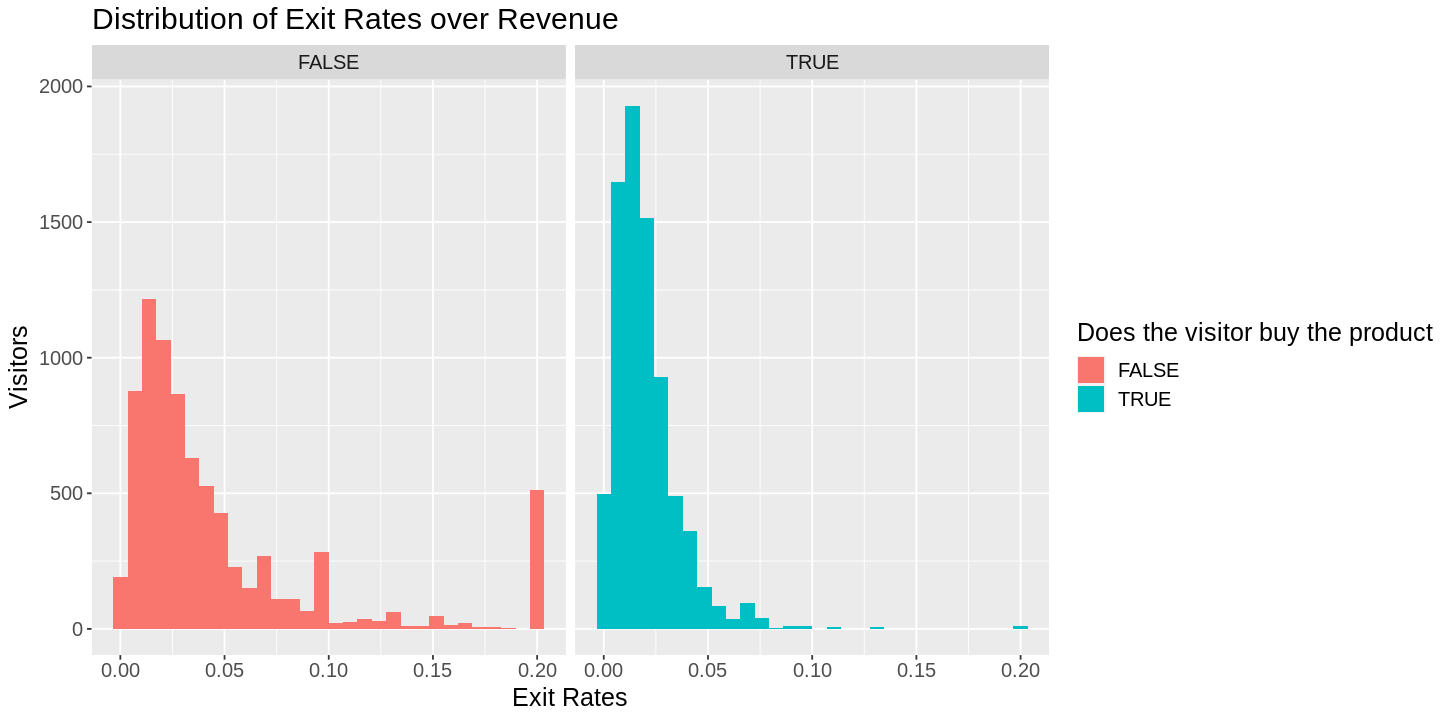

In [9]:
options(repr.plot.height = 6, repr.plot.width = 12)
exit_hist <- ggplot(shoppers_training_upsampled, aes(x = ExitRates, fill = Revenue)) +
    geom_histogram(position = "identity") +
    facet_grid(. ~ Revenue)+
    labs(x = "Exit Rates", y = "Visitors", fill = "Does the visitor buy the product",title="Distribution of Exit Rates over Revenue") +
    theme(text = element_text(size = 15))
exit_hist

Figure 2: Histogram of Exit Rates split horizontally by revenue (training set)

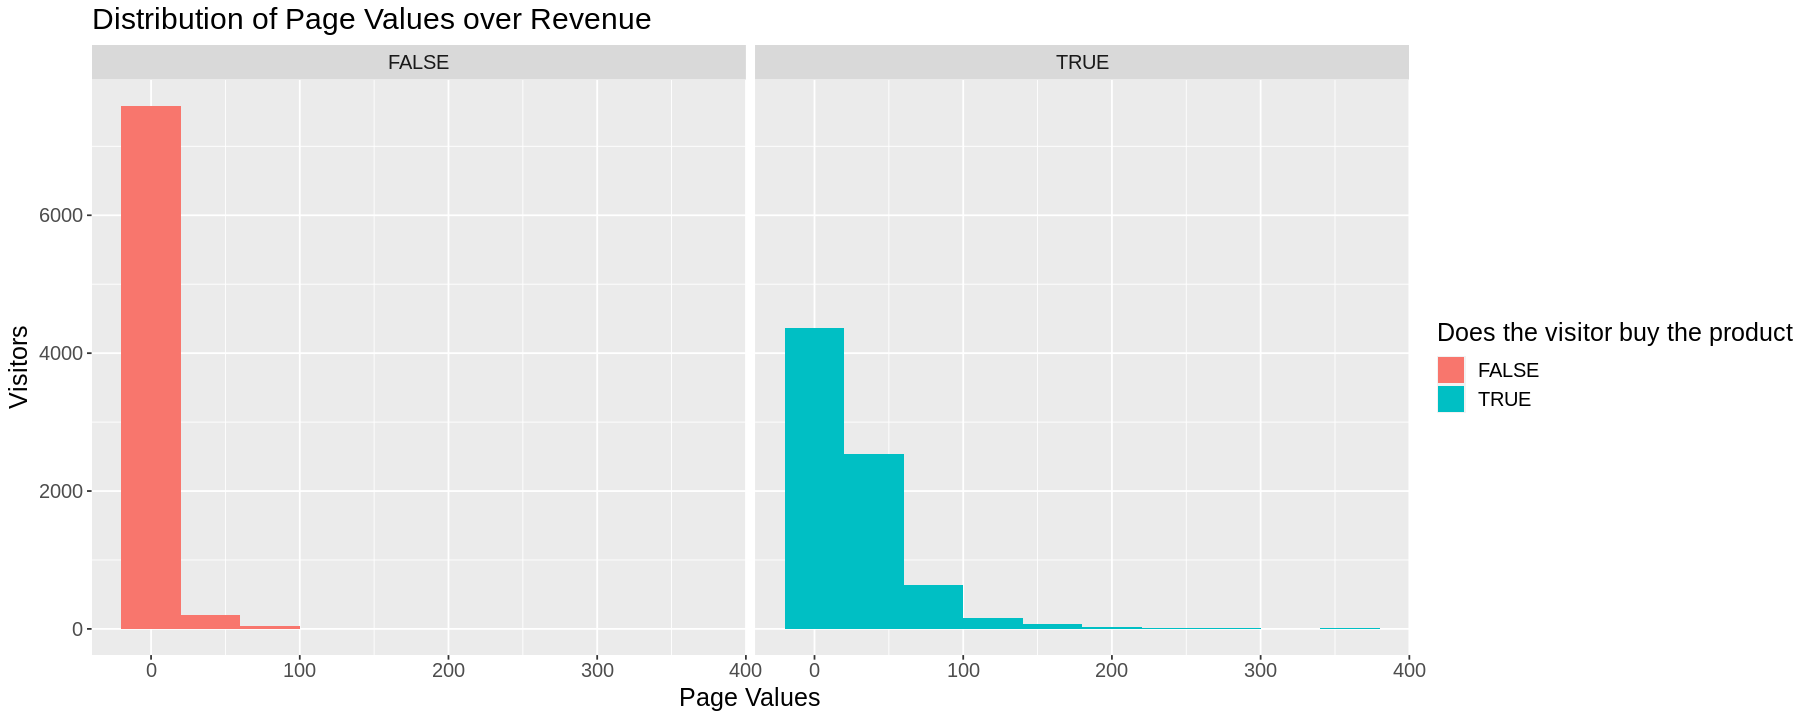

In [10]:
options(repr.plot.height = 6, repr.plot.width = 15)
page_values_hist <- ggplot(shoppers_training_upsampled, aes(x = PageValues, fill = Revenue)) +
    geom_histogram(position = "identity",binwidth=40) +
    facet_grid(. ~ Revenue)+
    labs(x = "Page Values", y = "Visitors", fill = "Does the visitor buy the product",title="Distribution of Page Values over Revenue") +
    theme(text = element_text(size = 15))
page_values_hist

Figure 3: Histogram of Page Values split horizontally by revenue (training set)

# Model-Training
[Back to Introduction](#Introduction)

## Standardizing Data 
The `shoppers_recipe` is created to specify the target variable and predictor variables. Note that the predictor variables are standardized using the `step_scale` and `step_center` functions

In [11]:
# scale and center the training set for k-nearest neighbors algorithm
shoppers_recipe <- recipe(Revenue ~ ., data = shoppers_training_upsampled) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors()) 


## Tuning the Classifier

#### Creating a KNN Model

In this part we indicated the model to be K-nearest neighbours classification by using the `nearest_neighbor` function. The `weight_func` is set to `"rectangular"` so that each vote is assigned a value of 1. The number of `neighbours` is set to `tune()`, given we are using cross-validation at this point to find the number of neighbours to use for our model. The `set_engine` specifies that the training the model is `"kknn"` and the `set_engine` function specifies that this is a `"classification"` problem. 

### Splitting and Shuffling
We split `shoppers_training_upsampled` further into two subsets (i.e. training set and validation set) using the function `vfold_cv`. In this case, we use a fold of 5, indicating that the data is shuffled and split 5 times for accuracy (i.e. avoiding (un)lucky sets).

### Creating the Workflow,
Then, we create a workflow `shoppers_workflow` to be used for training. This workflow uses `shoppers_recipe` and `knn_spec` as previously defined. The `tune_grid` function is used to compute the accuracy/performance when neighbours = 1, 2, 3, ..., 20.

In [12]:
# tune the classifier by cross validation
knn_spec <- nearest_neighbor(weight_func = 'rectangular', neighbors = tune()) %>%
    set_engine('kknn') %>%
    set_mode('classification')

shoppers_vfold <- vfold_cv(shoppers_training_upsampled, v = 5, strata = Revenue)

shoppers_workflow <- workflow() %>%
    add_recipe(shoppers_recipe) %>%
    add_model(knn_spec) %>%
    tune_grid(resamples = shoppers_vfold,
              grid = tibble(neighbors = seq(1, 20, 1))) %>%
    collect_metrics()
shoppers_workflow

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9240835,5,0.001221103,Model01
1,roc_auc,binary,0.9240835,5,0.001221103,Model01
2,accuracy,binary,0.9240835,5,0.001070491,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
19,roc_auc,binary,0.9057256,5,0.002348850,Model19
20,accuracy,binary,0.8423573,5,0.002141972,Model20
20,roc_auc,binary,0.9051031,5,0.002337307,Model20


### Comparing Accuracies 
Figure 4 shows the accuracy estimate against the number of neighbours from n  = 1 to n = 20.

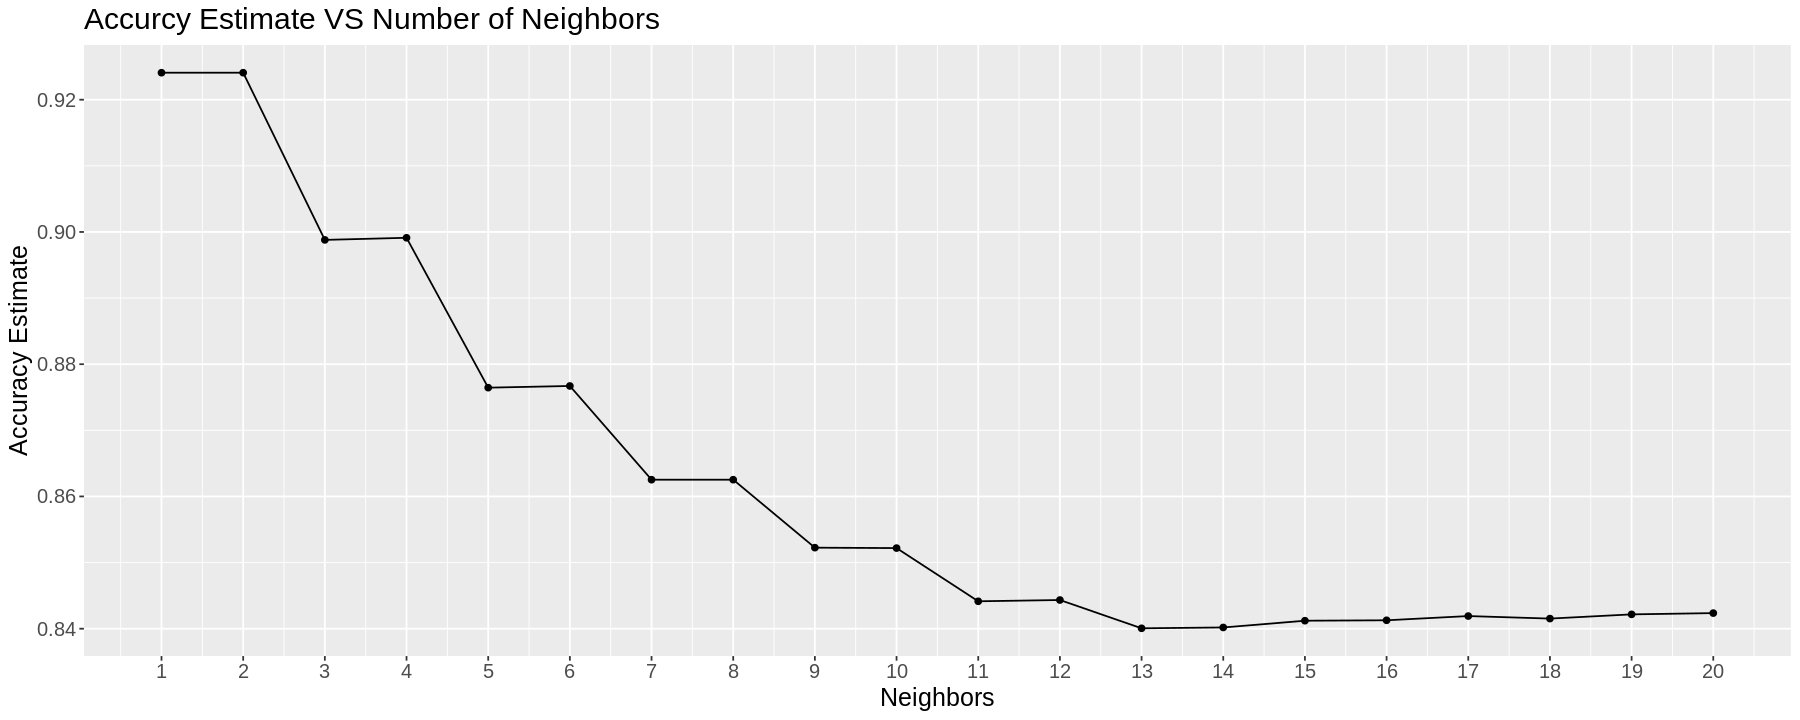

In [13]:
# visualize the relationship between number of neighbors and estimate accuracy
shoppers_accuracy <- shoppers_workflow %>%
    filter(.metric == 'accuracy') %>%
    ggplot(aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        scale_x_continuous(breaks = seq(1, 20, by = 1)) +
        labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accurcy Estimate VS Number of Neighbors") + 
        theme(text = element_text(size = 15))
shoppers_accuracy

Figure 4: Scatter plot and line plot of accuracy estimate versus number of neighbours

### Re-creating KNN model for n = 2
Upon choosing n = 2, we created `knn_spec_k2` to update the number of neighbours from `tune()` to 2.\n",
### Updating the Workflow
Given the new model, we must recreate the workflow to update the model from `knn_spec` to `knn_spec_k2`. In addition, we must replace `tune_grid` with `fit` to train the model on the initial training set `shoppers_training_upsampled`.

In [14]:
# choose k = 2 and rebuild the model
knn_spec_k2 <- nearest_neighbor(weight_func = 'rectangular', neighbors = 2) %>%
    set_engine('kknn') %>%
    set_mode('classification')

shoppers_workflow_k2 <- workflow() %>%
    add_recipe(shoppers_recipe) %>%
    add_model(knn_spec_k2) %>%
    fit(data = shoppers_training_upsampled)

# Gauge
[Back to Introduction](#Introduction)

### Applying the Model

`prediction` is created by applying the workflow, `shoppers_workflow_k2` on the test set.  It is a tibble showing the `predicted Revenue` and the `actual Revenue` along with the predictor parameters in the model. This allows us to calculate the accuracy of our trained model, as shown below in `prediction_metrics`.

In [15]:
# make prediction on test set and bind the prediction to it
prediction <- shoppers_workflow_k2 %>%
    predict(shoppers_testing) %>%
    bind_cols(shoppers_testing)

# calculate the accuracy
prediction_metrics <- prediction %>%
    metrics(truth = Revenue, estimate = .pred_class)   

prediction_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8637249
kap,binary,0.4756724


### Evaluating Accuracy

The `shoppers_mat` summarizes the accuracy of the predicted values using a `conf_mat` function. Here we see that our model was able to correctly predict real negatives = 2,399 and real positives = 263, and false negatives = 228 and false positives = 192. 

The `prediction_metrics` from the code above shows that our model accurately predicted 86.6% of the observations in the test set.

In [16]:
shoppers_mat <- prediction %>%
      conf_mat(truth = Revenue, estimate = .pred_class) 

shoppers_mat

          Truth
Prediction FALSE TRUE
     FALSE  2399  228
     TRUE    192  263

## Visualizing the results

The next blocks of code will create a visualization of the results of our trained model.

Using `seq` we created an ordered (using `min` and `max`) list of observations based on the values of the respective predictive variables (i.e. `PageValues`, `BounceRates`, and `ExitRates`). 

Then, the three ordered lists are combined into a tibble using `as_tibble` and assigned this as `asgrid`. 

In [17]:
# create the grid of area/smoothness vals, and arrange in a data frame
page_grid <- seq(min(shoppers_data$PageValues), max(shoppers_data$PageValues), length.out = 150)
bounce_grid <- seq(min(shoppers_data$BounceRates), max(shoppers_data$BounceRates), length.out = 80)
exit_grid <- seq(min(shoppers_data$ExitRates), max(shoppers_data$ExitRates), length.out = 80)
asgrid <- as_tibble(expand.grid(PageValues = page_grid, BounceRates = bounce_grid, ExitRates = exit_grid))

We applied our KNN classification model (k = 2) to `asgrid` using the `predict` function, and named this `knnPredGrid`. Then we created a table to include our results from `knnPredGrid` to `asgrid` using `bind_cols`. The `.pred_class` category was renamed to `Revenue` using the `rename` function. 

In [ ]:
# use the fit workflow to make predictions at the grid points
knnPredGrid <- predict(shoppers_workflow_k2, asgrid)

# bind the predictions as a new column with the grid points
prediction_table <- bind_cols(knnPredGrid, asgrid) %>% rename(Revenue = .pred_class)

The next section specifies the colors that will be used in our visualization.

In [ ]:
# mannually choosing the colors
cbPalette <- c("#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7", "#999999")

Having 3 predictive variables would result into a 3d graph if we were to visualize their relationship in one graph. However, we decided to keep the visuals as 2d in order to keep the visuals easy to read. To do this, we created 3 different 2d scatterplots for each 2-variable combinations to visualize their relationship with the target value.

The three predictive variables resulted into 3 combinations: 
* Plot 1: PageValues vs BounceRates
* Plot 2: BounceRates vs ExitRates
* Plot 3: PageValues vs ExitRates

In [ ]:
# plot:
# 1. the coloured scatter of the original data
# 2. the faded coloured scatter for the grid points
options(repr.plot.width = 18, repr.plot.height = 8)
page_bounce_plot <-
    ggplot() +
    geom_point(data = shoppers_data, mapping = aes(x = PageValues, y = BounceRates, color = Revenue), alpha = 0.9) +
    geom_point(data = prediction_table, mapping = aes(x = PageValues, y = BounceRates, color = Revenue), alpha = 0.006, size = 2.) +
    labs(color = "Does the visitor buy the product") +
    scale_color_manual(labels = c("TRUE", "FALSE"), values = cbPalette) + 
    theme(text = element_text(size = 15))
page_bounce_plot

Figure 5: Scatterplot of Bounce Rates versus Page Values where background colour indicates the decision of the classifier

In [ ]:
# plot:
# 1. the coloured scatter of the original data
# 2. the faded coloured scatter for the grid points
options(repr.plot.width = 12, repr.plot.height = 8)

bounce_exit_plot <-
  ggplot() +
  geom_point(data = prediction_table, mapping = aes(x = BounceRates, y = ExitRates, color = Revenue), alpha = 0.006, size = 2.) +
  geom_point(data = shoppers_data, mapping = aes(x = BounceRates, y = ExitRates, color = Revenue), alpha = 0.7) +
  labs(color = "Does the visitor buy the product") +
  scale_color_manual(labels = c("TRUE", "FALSE"), values = cbPalette)+ 
theme(text = element_text(size = 15))
bounce_exit_plot

Figure 6: Scatterplot of Exit Rates versus Bounce Rates where background colour indicates the decision of the classifier

In [ ]:
# plot:
# 1. the coloured scatter of the original data
# 2. the faded coloured scatter for the grid points
options(repr.plot.width = 18, repr.plot.height = 8)

page_exit_plot <-
  ggplot() +
  geom_point(data = shoppers_data, mapping = aes(x = PageValues, y = ExitRates, color = Revenue), alpha = 0.8) +
  geom_point(data = prediction_table, mapping = aes(x = PageValues, y = ExitRates, color = Revenue), alpha = 0.006, size = 2.) +
  labs(color = "Does the visitor buy the product") +
  scale_color_manual(labels = c("TRUE", "FALSE"), values = cbPalette)+ 
  theme(text = element_text(size = 15))
page_exit_plot

Figure 6: Scatterplot of Exit Rates versus Page Values where background colour indicates the decision of the classifier

# Discussion
[Back to Introduction](#Introduction)

In conclusion, we have built a knn classification model based on clickstream data of online shoppers to predict their purchase intention. From the 3 visualization scatter plots we can see that PageValue is doing a good job in separating two classes of shoppers (figure 5 and figure 7), while exit rates and bounce rates do not predict well on our test set (figure 6).

In figure 6, the two colors  indicating the Revenue (whether a customer buys a product or not) are not clearly distinguished. The color fields overlap with each other showing that for each particular pair of values Bounce Rates and Exit Rates, the boundary between predicting Revenue to be true or false is very vague. This suggests that it would be difficult to use these two variables - Bounce Rates and Exit Rates- to effectively predict Revenue. On the other hand, figures 5 and 7 display an obvious horizontal separation of the two colors, corresponding to the variable Page Values on the horizontal axis. The clearly distinguishable color fields imply that Page Values does a good job of telling the difference between the two customers’ decision. More specifically, the Page Values’ numbers from 0 to 75 and from around 200 to above seem to be associated with the customers’ decision not to buy the product while for other values of Page Values, the firms would likely generate revenues from their customers.

In this scenario, the potential risk for making type 1 error is that the firms would waste money and time on advertising or such to the customers that would not buy the product. At the same time, the firms may lose focus on potential customers which leads to a loss in their profit if type 2 errors happen. By comparing the columns of the confusion matrix, we can see that the false positive rate(192/(192+2399))  of our model is much lower than the false negative rate(228/(263+228)), indicating that the model is more likely to make type 2 errors.

This is also what we expected to find as from the correlation matrix we performed during the data preprocessing, Page Values was the variable that had the highest correlation with Revenue, advising that this variable might be useful in predicting Revenue. However, even though Page Values had the highest correlation with Revenue among all the potential predictors, the correlation itself was only 0.4 - not a high value. Therefore, we did not expect Page Values alone to well predict Revenue. Meanwhile, as shown in the data exploration, the data is imbalanced and has many more cases where customers do not buy the product. Since we do not have much information about these customers, it is within our expectation that the model does not predict well in this case thus we had more type 2 errors.

Such findings would allow firms to choose the predictor - Page values - to predict their customers’ decision while avoiding the other predictors that yield high errors, thus save on costs and time when building their own prediction model. This finding, therefore, would help firms classify online shoppers, targeting their potential customers and deliver more effective services and advertisements to these customers that will finally result in higher revenue for the firms.

Possibilities for future research include building the model using other predictors to check their accuracies, collecting data about new variables that might be more helpful in predicting Revenue, or using other methods beyond the scope of our project that would improve the accuracy of our existing model. Additionally, when building our model, due to limitation of our knowledge, we’ve skipped categorical variables which are potentially effective predictors. Using these variables to build the prediction model could be another direction for future studies.
